# 1. Import Library

In [12]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [3]:
path_electricity_generation = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\Electricity_Generation_Processed.csv"
path_population = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\population_monthly.csv"
path_sunshine = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\sunshine_monthly.csv"
path_humidity = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\vietnam-temperature-handled-data.csv"

In [4]:
# List các đường dẫn
paths = [
    path_electricity_generation,
    path_population,
    path_sunshine,
    path_humidity,
    path_rainfall,
    path_temperature,
]

In [5]:
YEARS = [year for year in range(2002, 2023)]

In [6]:
MONTHS = [month for month in range(1, 13)]

## 2. Prediction Using Arima Model

# 3. Sarimax Model

In [42]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
 
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima -q
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

In [124]:
filtered_data = pd.read_csv("[2002-2021] Multivariate-data copy.csv")

In [125]:
# Giả sử `filtered_data` đã được tải từ CSV và chưa có chỉ mục datetime
filtered_data['Date'] = pd.to_datetime(filtered_data[['Year', 'Month']].assign(DAY=1))
filtered_data.set_index('Date', inplace=True)

In [127]:
# In một số dòng đầu tiên để kiểm tra cấu trúc mới của DataFrame
print(filtered_data.head())

            Year  Month  Population  Sunshine (Hours)  Rainfall (mm)  \
Date                                                                   
2002-01-01  2002      1  79537700.0        157.133333        20.0285   
2002-02-01  2002      2  79615175.0        145.800000        21.6108   
2002-03-01  2002      3  79692650.0        104.400000        58.0542   
2002-04-01  2002      4  79770125.0        209.600000        60.3292   
2002-05-01  2002      5  79847600.0        200.533333       209.9270   

            Temperature (C)  Humidity (%)  Electricity Generation (GWh)  
Date                                                                     
2002-01-01          20.1471     81.133333                        2690.5  
2002-02-01          22.0605     81.733333                        2294.9  
2002-03-01          23.3405     80.866667                        2866.5  
2002-04-01          26.3616     79.600000                        2956.6  
2002-05-01          26.8793     80.400000          

In [128]:
# filtered_data.to_csv("Mutivariate-with-date.csv")

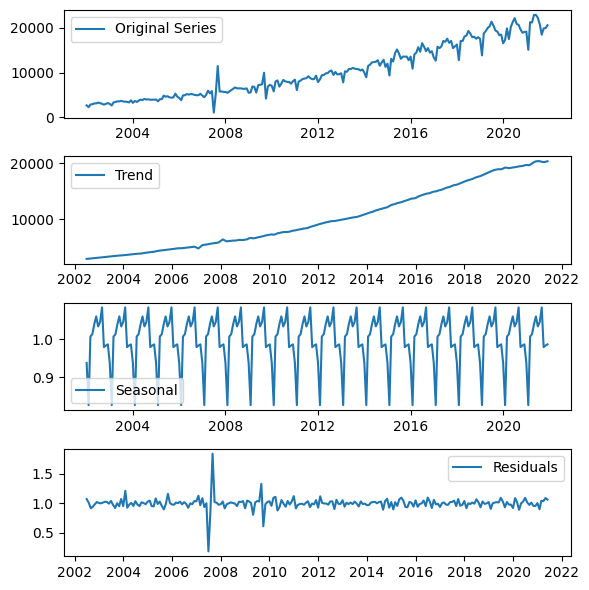

In [129]:
result = seasonal_decompose(filtered_data['Electricity Generation (GWh)'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()
 
# Plot the decomposed components
plt.figure(figsize=(6,6))
 
plt.subplot(4, 1, 1)
plt.plot(filtered_data['Electricity Generation (GWh)'], label='Original Series')
plt.legend()
 
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
 
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()
 
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
 
plt.tight_layout()
plt.show()

In [130]:
filtered_data.head(5)

,Year,Month,Population,Sunshine (Hours),Rainfall (mm),Temperature (C),Humidity (%),Electricity Generation (GWh)
Date,,,,,,,,
2002-01-01,2002,1,79537700.0,157.133333,20.0285,20.1471,81.133333,2690.5
2002-02-01,2002,2,79615175.0,145.800000,21.6108,22.0605,81.733333,2294.9
2002-03-01,2002,3,79692650.0,104.400000,58.0542,23.3405,80.866667,2866.5
2002-04-01,2002,4,79770125.0,209.600000,60.3292,26.3616,79.600000,2956.6
2002-05-01,2002,5,79847600.0,200.533333,209.9270,26.8793,80.400000,3128.1


In [131]:
# Tạo biến ngoại sinh từ chỉ mục ngày tháng
filtered_data['Year'] = filtered_data.index.year
filtered_data['Month'] = filtered_data.index.month

# Chuẩn bị biến ngoại sinh
exogenous_features = filtered_data[['Temperature (C)', 'Humidity (%)', 'Sunshine (Hours)', 'Rainfall (mm)', 'Population', 'Year', 'Month']]

# Huấn luyện mô hình
SARIMAX_model = pm.auto_arima(filtered_data['Electricity Generation (GWh)'], 
                              exogenous=exogenous_features,
                              start_p=1, start_q=1,
                              test='adf',
                              max_p=3, max_q=3, m=12,
                              start_P=0, seasonal=True,
                              d=None, D=1,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3817.383, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3857.895, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3807.339, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3815.261, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3970.750, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3859.787, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3804.979, Time=1.90 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=3807.673, Time=2.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3805.689, Time=0.67 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3816.953, Time=1.72 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3806.530, Time=1.50 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=3805.801, Time=1.47 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3806.438, Time=1.62 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=3807.022, Time=1.72 sec
 ARIMA(1,0,0)(2,1,0

In [132]:
def sarimax_forecast(SARIMAX_model, filtered_data, future_exog, periods=12):
    # future_exog: DataFrame chứa các giá trị dự đoán của Year, Month, Temperature, Humidity, Sunshine, Rainfall, Population cho 12 tháng tiếp theo.
    
    # Đảm bảo rằng future_exog có chỉ số datetime tương ứng với các tháng dự đoán
    index_of_fc = pd.date_range(filtered_data.index[-1] + pd.DateOffset(months=1), periods=periods, freq='MS')
    future_exog.index = index_of_fc
    
    # Kiểm tra để chắc chắn rằng future_exog có đúng các cột
    required_columns = ["Year", "Month", "Temperature (C)", "Humidity (%)", "Sunshine (Hours)", "Rainfall (mm)", "Population"]
    for col in required_columns:
        if col not in future_exog.columns:
            raise ValueError(f"Thiếu cột {col} trong future_exog")
    
    # Thực hiện dự đoán với các biến ngoại sinh
    fitted, confint = SARIMAX_model.predict(n_periods=periods,
                                            return_conf_int=True,
                                            exogenous=future_exog[required_columns])
    
    # Tạo series cho mục đích vẽ biểu đồ
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Vẽ biểu đồ
    plt.figure(figsize=(15, 7))
    plt.plot(filtered_data["Electricity Generation (GWh)"], color='#1f76b4', label='Historical')
    plt.plot(fitted_series, color='darkgreen', label='Forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15, label='Confidence Interval')
    plt.title("SARIMAX - Forecast of Electricity Generation")
    plt.legend()
    plt.show()
    
    return fitted_series

In [135]:
year_2022_data = pd.read_csv('[2022] Multivariate-data.csv')

In [145]:
year_2022_data['Population'].values

array([9.94744200e+07, 9.95472392e+07, 9.96200583e+07, 9.96928775e+07,
       9.97656967e+07, 9.98385158e+07, 9.99113350e+07, 9.99841542e+07,
       1.00056973e+08, 1.00129792e+08, 1.00202612e+08, 1.00275431e+08])

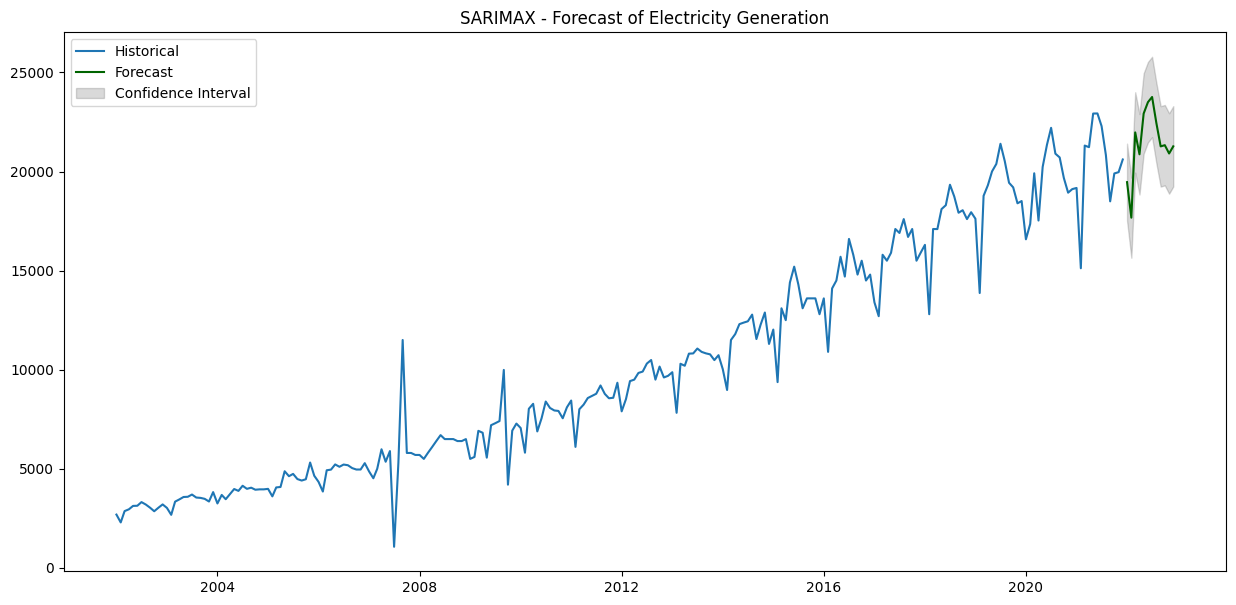

In [155]:
# Ví dụ về cách sử dụng hàm với future_exog:
future_exog = pd.DataFrame({
      "Year": [2022]*12,
      "Month": list(range(1, 13)),
      "Temperature (C)": [20.61333333, 19.42      , 23.75333333, 24.53333333, 26.04666667,
         28.09333333, 27.84      , 27.22666667, 26.49333333, 24.58666667,
         24.4       , 19.71333333],  #
      "Humidity (%)": [82.66666667, 81.93333333, 82.8       , 80.        , 81.8       ,
         78.93333333, 80.86666667, 82.33333333, 83.26666667, 80.        ,
         82.33333333, 77.26666667],    
      "Sunshine (Hours)": [134.8       , 103.69333333, 149.76666667, 175.06666667,
         148.24666667, 204.78      , 201.12      , 184.36      ,
         150.54666667, 153.02666667, 156.14      , 108.17333333],       
      "Rainfall (mm)": [ 52.72666667,  75.89285714,  95.56      , 163.        ,
         273.02666667, 185.78571429, 234.96666667, 303.68666667,
         412.23333333, 373.92666667, 179.47333333, 148.56      ],     
      "Population": [9.94744200e+07, 9.95472392e+07, 9.96200583e+07, 9.96928775e+07,
         9.97656967e+07, 9.98385158e+07, 9.99113350e+07, 9.99841542e+07,
         1.00056973e+08, 1.00129792e+08, 1.00202612e+08, 1.00275431e+08]
})

# Gọi hàm dự đoán
predicted_values = sarimax_forecast(SARIMAX_model, filtered_data, future_exog, periods=12)